# PART-1

HTML report generated: red_wine_profile_report.html


<Figure size 1500x1000 with 0 Axes>

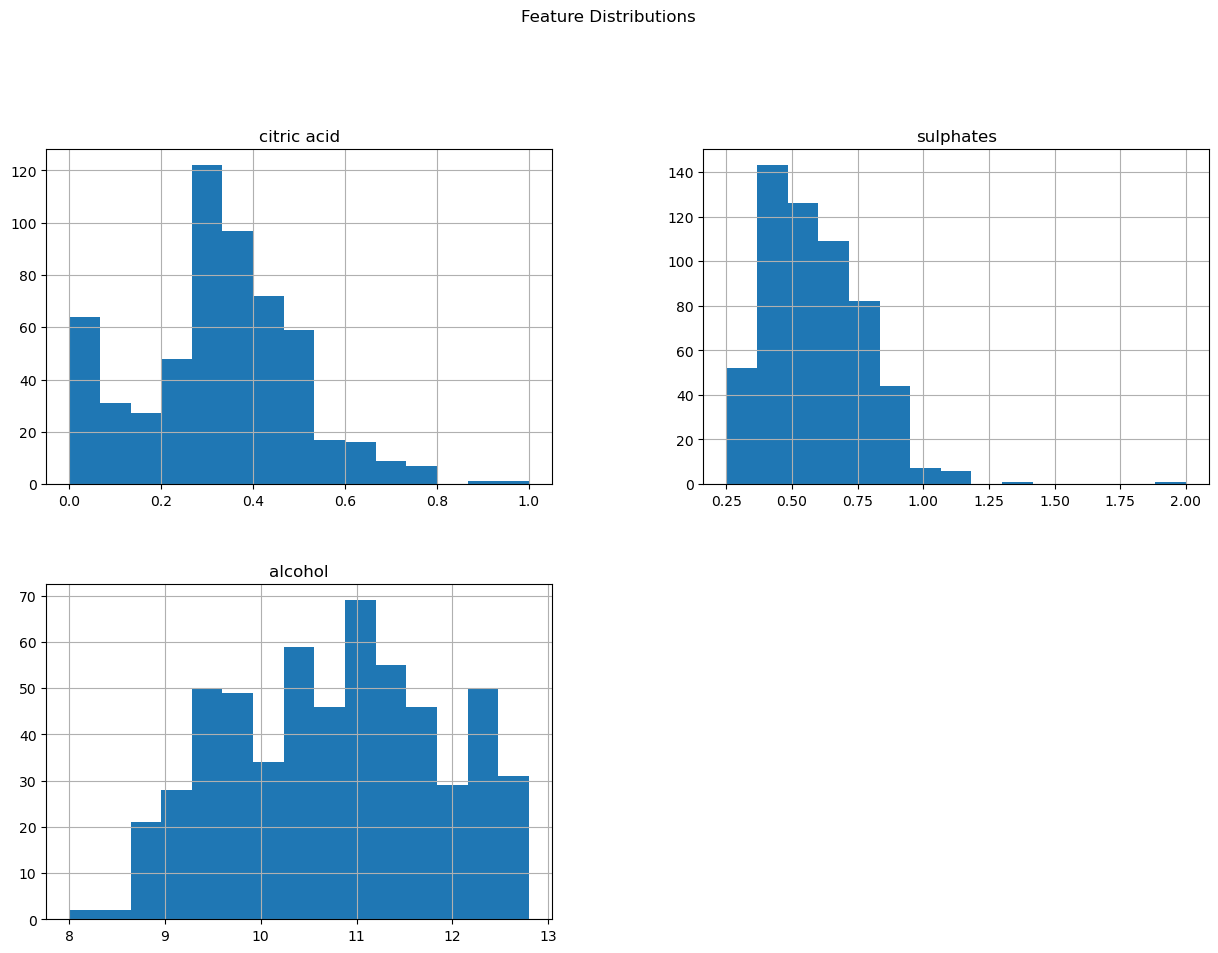

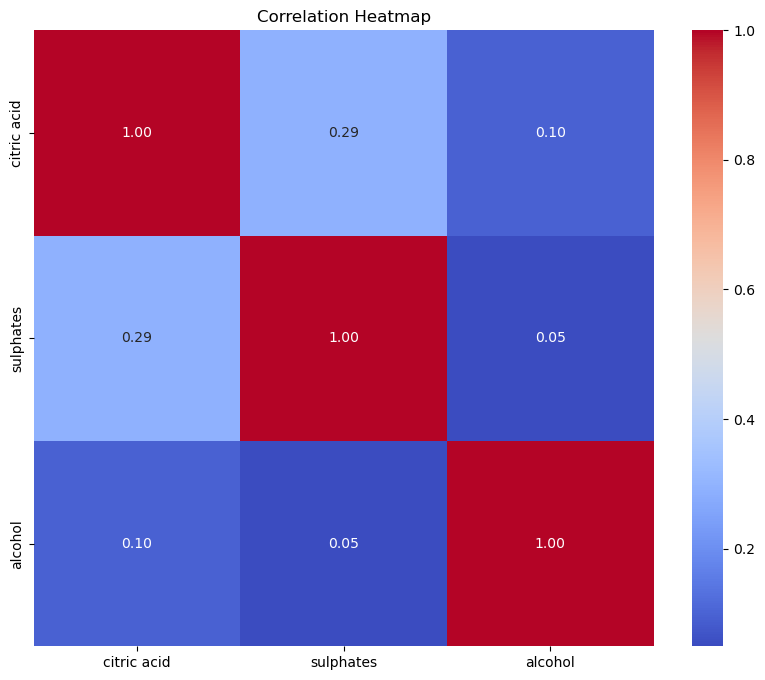

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the red wine dataset
red_wine_df = pd.read_csv(r'C:\Users\srava\Downloads\red_wine.csv')  # Replace with your actual file path

# Step 1: Summary Statistics and Missing Values
summary_stats = red_wine_df.describe(include='all').to_html()  # Include non-numeric in summary
missing_values = red_wine_df.isnull().sum().to_frame(name="Missing Values").to_html()

# Step 2: Correlation Matrix (Only numeric columns)
numeric_columns = red_wine_df.select_dtypes(include=[np.number]).columns
correlation_matrix = red_wine_df[numeric_columns].corr()

# Step 3: Generate Visualizations

# Save histogram for feature distributions
plt.figure(figsize=(15, 10))
red_wine_df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions", y=1.02)
plt.savefig("feature_distributions.png")

# Save heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")

# Step 4: Create an HTML file and embed the results
html_content = f"""
<html>
<head>
    <title>Red Wine Data Profiling Report</title>
</head>
<body>
    <h1>Red Wine Data Profiling Report</h1>
    
    <h2>Summary Statistics</h2>
    {summary_stats}

    <h2>Missing Values</h2>
    {missing_values}

    <h2>Feature Distributions</h2>
    <img src="feature_distributions.png" alt="Feature Distributions" width="700">
    
    <h2>Correlation Heatmap</h2>
    <img src="correlation_heatmap.png" alt="Correlation Heatmap" width="700">

</body>
</html>
"""

# Write the HTML content to a file
with open("red_wine_profile_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated: red_wine_profile_report.html")

# PART-2

In [9]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load Data
data = pd.read_csv(r'C:\Users\srava\Downloads\red_wine.csv')

# Define target and features
X = data.drop(columns=['type'])
y = data['type']

# Baseline Model Metrics
# Majority class prediction accuracy
baseline_accuracy = max(y.value_counts(normalize=True))
# Random classifier AUC (assuming binary classification)
baseline_auc = 0.5

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Custom scoring functions
def calculate_auc(y_true, y_pred_proba):
    return roc_auc_score(y_true, y_pred_proba[:, 1])

def calculate_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Performance Metrics for Each Model
results = {
    'Model': [],
    'AUC': [],
    'Accuracy': []
}

for model_name, model in models.items():
    # Cross-validated AUC
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    # Cross-validated Accuracy
    acc_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    # Store results
    results['Model'].append(model_name)
    results['AUC'].append(np.mean(auc_scores))
    results['Accuracy'].append(np.mean(acc_scores))

# Add Baseline Metrics
results['Model'].append('Baseline')
results['AUC'].append(baseline_auc)
results['Accuracy'].append(baseline_accuracy)

# Display Results
df_results = pd.DataFrame(results)
print(df_results)

                 Model       AUC  Accuracy
0  Logistic Regression  0.875819  0.784392
1          Naive Bayes  0.893291  0.824773
2        Decision Tree  0.811394  0.810708
3           SVM-Linear  0.875446  0.793134
4              SVM-RBF  0.855024  0.535844
5        Random Forest  0.919684  0.850907
6             Baseline  0.500000  0.528897


# PART-3

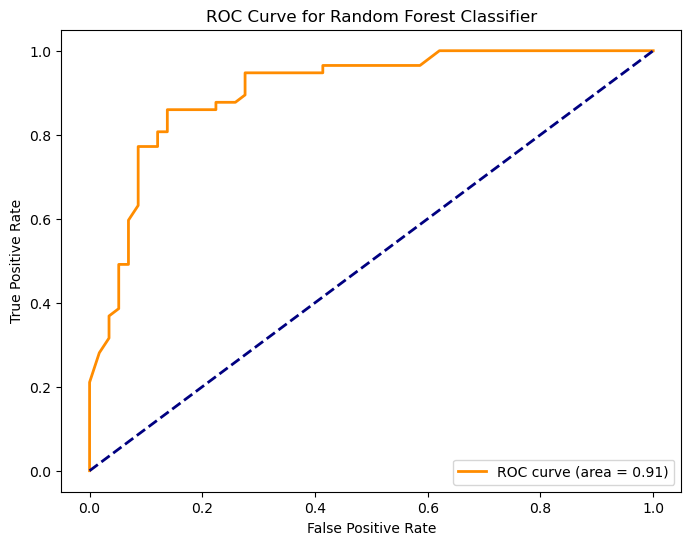

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define the path to the dataset
data_path = r"C:\Users\srava\Downloads\red_wine.csv" # Update this with your dataset path

# Load the dataset
df1 = pd.read_csv(data_path)

# Convert 'type' column to numerical values using label encoding
label_encoder = LabelEncoder()
df1['type'] = label_encoder.fit_transform(df1['type'])

# Define features and target
features = df1.drop('type', axis=1)
target = df1['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


# PART-4

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the white wine dataset
white_wine_path = r"C:\Users\srava\Downloads\white_wine.csv" # Update this with your white wine dataset path
white_wine_df = pd.read_csv(white_wine_path)

# Convert 'type' column to numerical values using label encoding if necessary
# Assuming 'type' is the column to predict; adjust as needed
label_encoder = LabelEncoder()
white_wine_df['type'] = label_encoder.fit_transform(white_wine_df['type'])

# Define features and target
white_features = white_wine_df.drop('type', axis=1)
white_target = white_wine_df['type']

# Predict probabilities for the positive class using the trained Random Forest model
y_prob_white = random_forest.predict_proba(white_features)[:, 1]

# Calculate ROC curve and AUC for the white wine dataset
fpr_white, tpr_white, thresholds_white = roc_curve(white_target, y_prob_white)
roc_auc_white = auc(fpr_white, tpr_white)

# Print the AUC score
print(f'AUC score for the Random Forest model on the white wine dataset: {roc_auc_white:.2f}')


AUC score for the Random Forest model on the white wine dataset: 0.93
